In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #importing necessary libraries
import seaborn as sns

In [2]:
#loading dataset
car=pd.read_csv("E:\SaiVenkat\Cars .csv")
car

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
#business problem
#we are trying to predict MPG(y) based on HP,VOL,SP,WT(x)
#As MPG is numerical --label and we have multiple independent variables we will go for mlr

In [7]:
car.head() 

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [8]:
car.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [9]:
car.info() #checking whether there are any missing values or not unfortunately there are no missing values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [10]:
car.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


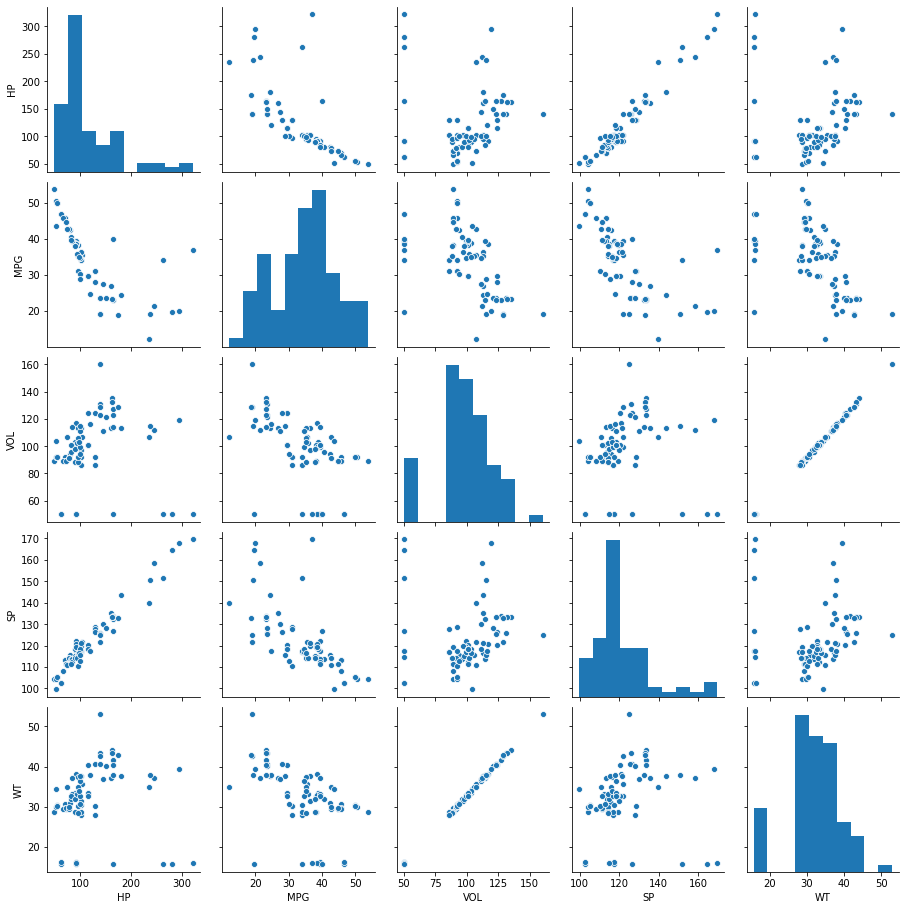

In [11]:
sns.pairplot(car) #as there are many independent variables instead of scatter plot its better to perform pair plot

In [ ]:
#if we observe the above graphs mostly we have to concentrate on mpg with other variables as it is response variable if we compare mpg with other variables there is a curvilinear relationship exits and for few input varibles like wt and sp vol and wt wt and vol there is correlation exits as per our assumption the independent variables are not correlated to each other

In [ ]:
#with the graph we have observed there is a correlation exists b/w two independent variables but for the values we will go for corr() method

In [12]:
car.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [13]:
car.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
#by observing few varibales like in Vol and wt the corr value is 0.99 and for sp and hp the corr value is 0.97 wt and vol the corr is 0.99 

In [ ]:
#if we observe mpg with all other variables we have found there is a negative correlation exists b/w all other independent variables.

In [ ]:
#if we increase y there is a decrease in x and viceversa and if we observe the values all are not perfectly correlated with y

In [15]:
#preparing model by considering all the variables
import statsmodels.formula.api as smf
model=smf.ols("MPG~HP+VOL+SP+WT",data=car).fit()

In [19]:
model.params #intercept and slope values

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [18]:
print(model.summary()) #summary of the model

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           1.54e-23
Time:                        20:09:49   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.0

In [ ]:
#the p value should be less than 0.05 if we observe from the above we find WT and VOl values are greater than 0.05 so we cannot go ahead for building a model.

In [ ]:
#preparing model based on single value first with VOL

In [22]:
m_v=smf.ols("MPG~VOL",data=car).fit()

In [23]:
print(m_v.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           3.82e-07
Time:                        20:16:19   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.0

In [ ]:
#if we observe the p value is less than 0.05 which means we can be able to predicty i.e mpg with the help of vol variable

In [ ]:
#preparing model with WT

In [25]:
m_w=smf.ols("MPG~WT",data=car).fit()

In [26]:
print(m_w.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           4.38e-07
Time:                        20:18:06   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.0

In [ ]:
#by observing above we can say that p value is less than 0.05 we can be able to predict y i.e mpg with the help of wt variable

In [ ]:
#preparing model based on both the variables wt and vol

In [28]:
m_v_w=smf.ols("MPG~VOL+WT",data=car).fit()

In [30]:
print(m_v_w.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           2.43e-06
Time:                        20:22:24   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.0

In [ ]:
#if we include both the variables and build a model again we are getting the p value more than 0.05 that means if we include both there may be insignificance.

In [ ]:
#if we build a model with individual variable the model is good but if we include both there is a relation exits between both the variables wt and vol that we can clearly see by observing visualization.

In [ ]:
#we have to delete one of the varible as both of them are correlated with each other.but which one should we delete.

In [ ]:
#with both the values p value became insignificant
#so checking whether the data has any influential points 
#with the help of influence plot we can able to find out.

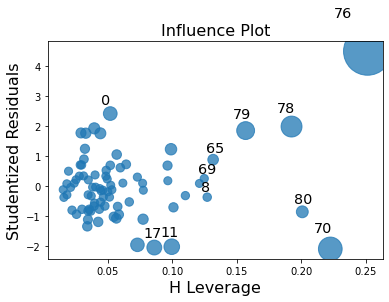

In [34]:
import statsmodels.api as sm
sm.graphics.influence_plot(model) #the bubble numbers represents rows
plt.show()

In [ ]:
#as per observation 76th row is influential so lets check

In [35]:
car.iloc[74:77]

,HP,MPG,VOL,SP,WT
74,140,19.086341,129,121.864163,42.618698
75,175,18.762837,129,132.864163,42.778219
76,322,36.900000,50,169.598513,16.132947


In [ ]:
#by observing hp and mpg the value of hp at 140 the mpg value is 19 and value of hp at 175 the mpg is 18 but if we observe 76 row the hp value is more and the mpg value is doubled so ther is some influence so deleting that from dataset

In [37]:
# index 76 is showing high influence so we can exclude that entire row

# Studentized Residuals = Residual/standard deviation of residuals
#without deleting that row from original dataset deleting that row by creating new dataset
car_new=car.drop(car.index[[76]],axis=0)
car_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
#again we are preparing a model after deleting the row

In [38]:
model1=smf.ols("MPG~HP+VOL+SP+WT",data=car_new).fit()

In [39]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.96
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           4.42e-27
Time:                        21:04:37   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             454.0
Df Residuals:                      75   BIC:                             465.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8268     13.323      2.089      0.0

In [ ]:
#by deleting row there is no change in p value of wt and vol it is still greater than 0.05

In [ ]:
#with the infuential we are not able to solve the problem.
#there is method to decide which varibale need to be deleted from the set i.e VIF (variance influential factor)
#VIF=1/1-R2
#if VIF >10 del or remove that variable (normally industry follows this) and in few industries they will follow VIF>5

In [ ]:
#calculating VIF and R2 values for all the independent variables individually

In [40]:
car_new.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [41]:
rsq_hp=smf.ols("HP~VOL+SP+WT",data=car_new).fit().rsquared  #calculating r2 and vif for hp like wise we need to cal for all independent variables

In [42]:
vif_hp=1/(1-rsq_hp)

In [43]:
print(rsq_hp)
print(vif_hp)

0.9411545637694932
16.993671286297275


In [44]:
rsq_vol=smf.ols("VOL~HP+SP+WT",data=car_new).fit().rsquared

In [45]:
vif_vol=1/(1-rsq_vol)

In [46]:
print(rsq_vol)
print(vif_vol)

0.9983409391302357
602.7506393674782


In [47]:
rsq_sp=smf.ols("SP~VOL+HP+WT",data=car_new).fit().rsquared

In [48]:
vif_sp=1/(1-rsq_sp)

In [49]:
print(rsq_sp)
print(vif_sp)

0.9415573222300498
17.110783389089956


In [50]:
rsq_wt=smf.ols("WT~SP+HP+VOL",data=car_new).fit().rsquared

In [51]:
vif_wt=1/(1-rsq_wt)

In [52]:
print(rsq_wt)
print(vif_wt)

0.9983417154550613
603.0328166852634


In [ ]:
#after calculating respective r2 and vif values representing those values in a dataframe

In [58]:
vif_df=pd.DataFrame({"Variable":["HP","VOL","SP","WT"],"VIF_Values":[vif_hp,vif_vol,vif_sp,vif_wt]})

In [59]:
vif_df

,Variable,VIF_Values
0,HP,16.993671
1,VOL,602.750639
2,SP,17.110783
3,WT,603.032817


In [ ]:
#as we can see that VIF value for all the variables is greater than 10.So we are deleting one variable and building a model if the model has  still insignificant p values we will again go for vif with remaining variables and again build the model until we will get the significant p values.

In [ ]:
#with the help of variable plot we can able to see all the individual plots of x's with respect to y so that we can visually see the linearity between individual x and y

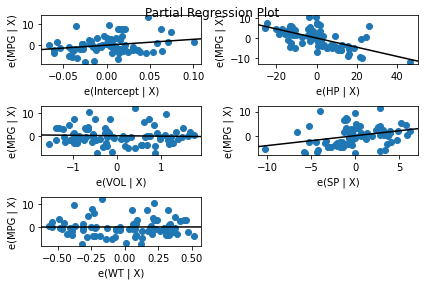

In [61]:
#added Variable
sm.graphics.plot_partregress_grid(model1)
plt.show()

In [ ]:
#by observing above graph with intercept of x and wt and sp of x there is some correlation exits but if we observe vol and wt the curve is parallel to x axis.however based on vif we are deleting the higher vif value variable

In [ ]:
#from the above grapgh weight is not showing any significance
#final model

In [62]:
final_model=smf.ols("MPG~VOL+HP+SP",data=car_new).fit()

In [63]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     114.8
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           3.78e-28
Time:                        22:31:37   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             452.0
Df Residuals:                      76   BIC:                             461.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7555     12.922      2.148      0.0

In [ ]:
#now from the above summary we can observe that p values are significant and each and every individual p value is <0.05 

In [64]:
final_model.params

Intercept    27.755465
VOL          -0.172856
HP           -0.226762
SP            0.412363
dtype: float64

In [ ]:
#the straight line equation looks like MPG=27.76-0.17VOL-0.226HP+0.41SP

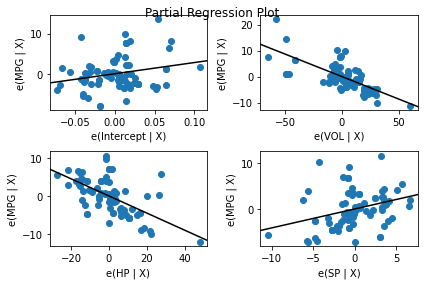

In [66]:
sm.graphics.plot_partregress_grid(final_model)
plt.show()

In [71]:
mpg_pred=final_model.predict(car_new)
mpg_pred

0     44.222122
1     42.869122
2     42.869122
3     42.766593
4     42.910283
        ...    
75    20.561966
77    15.999879
78    21.987849
79     9.544891
80    13.409222
Length: 80, dtype: float64

In [ ]:
#linearity

In [ ]:
#observed values and predicted values

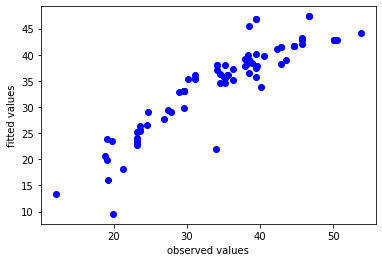

In [72]:
plt.scatter(car_new['MPG'],mpg_pred,color='b');
plt.xlabel("observed values");
plt.ylabel("fitted values");
plt.show();

In [ ]:
#by the above graph we can say that observed and predicted values are linearly related.

In [ ]:
#we have to check the residuals and is there any pattern asscoiated or any linearity with each and every residual

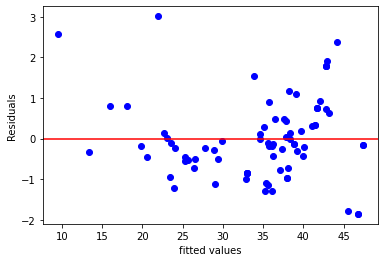

In [76]:
plt.scatter(mpg_pred,final_model.resid_pearson,color='b'),plt.axhline(y=0,color='r');
plt.xlabel("fitted values");
plt.ylabel("Residuals");
plt.show();

In [ ]:
#normality plot for residuals

(array([ 3., 10., 15., 22., 11.,  9.,  3.,  4.,  1.,  2.]),
 array([-1.8559575 , -1.36867167, -0.88138584, -0.39410002,  0.09318581,
         0.58047164,  1.06775747,  1.55504329,  2.04232912,  2.52961495,
         3.01690078]),
 <a list of 10 Patch objects>)

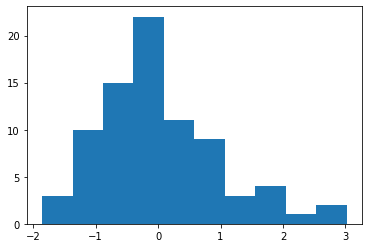

In [77]:
plt.hist(final_model.resid_pearson)# Checking the standardized residuals are normally distributed

In [ ]:
#normality can be checked with the help of qqplot

In [79]:
##QQplot for residuals
import pylab
import scipy.stats as st

((array([-2.38125369, -2.03479543, -1.83330035, -1.68678671, -1.5695028 ,
         -1.47053363, -1.38417871, -1.3070663 , -1.2370281 , -1.17258291,
         -1.11267145, -1.05650837, -1.0034942 , -0.95316016, -0.90513215,
         -0.85910636, -0.81483233, -0.77210076, -0.73073472, -0.69058296,
         -0.65151497, -0.61341711, -0.57618961, -0.53974416, -0.50400205,
         -0.46889262, -0.434352  , -0.40032208, -0.36674966, -0.33358569,
         -0.3007847 , -0.26830426, -0.2361045 , -0.20414775, -0.17239819,
         -0.14082151, -0.10938465, -0.07805556, -0.0468029 , -0.01559591,
          0.01559591,  0.0468029 ,  0.07805556,  0.10938465,  0.14082151,
          0.17239819,  0.20414775,  0.2361045 ,  0.26830426,  0.3007847 ,
          0.33358569,  0.36674966,  0.40032208,  0.434352  ,  0.46889262,
          0.50400205,  0.53974416,  0.57618961,  0.61341711,  0.65151497,
          0.69058296,  0.73073472,  0.77210076,  0.81483233,  0.85910636,
          0.90513215,  0.95316016,  1.

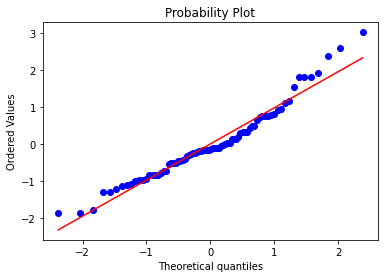

In [81]:
#checking residuals are normally distributed 
st.probplot(final_model.resid_pearson,dist="norm",plot=pylab)

In [ ]:
#by the above graph all the datapoints are lying on the lie so the data is normally distributed

In [92]:
#check rmse error
error=car_new['MPG']-mpg_pred
error

0      9.478559
1      7.144280
2      7.144280
3      2.929729
4      7.593949
        ...    
75    -1.799129
77     3.198008
78    12.012151
79    10.288842
80    -1.307959
Length: 80, dtype: float64

In [93]:
squareerror=error*error
squareerror

0      89.843089
1      51.040731
2      51.040731
3       8.583314
4      57.668061
         ...    
75      3.236865
77     10.227256
78    144.291765
79    105.860264
80      1.710756
Length: 80, dtype: float64

In [94]:
mse=np.mean(squareerror)
mse

15.06062857384498

In [95]:
rmse=np.sqrt(mse)
rmse

3.880802568264067

In [ ]:
#rmse is used to comparing models however we have build here only one model with MLR

In [97]:
residual=pd.DataFrame(car_new["MPG"]-mpg_pred) #checking mean
residual

,0
0,9.478559
1,7.144280
2,7.144280
3,2.929729
4,7.593949
...,...
75,-1.799129
77,3.198008
78,12.012151
79,10.288842


In [98]:
residual.mean()

0   -9.658940e-15
dtype: float64